<a href="https://colab.research.google.com/github/igoradriano/Inteligencia-Artificial/blob/main/Fuzzy_Exemplo_gorgetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy - exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


## Instalação e importação das bibliotecas

In [340]:
!pip install scikit-fuzzy

In [341]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [342]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [343]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [344]:
qualidade

Antecedent: qualidade

In [345]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [346]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')


In [347]:
gorjeta

Consequent: gorjeta

In [348]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [349]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa']) #number = 3, temos 3 valores possíveis para a divisão das notas
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

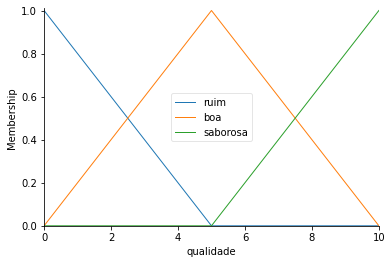

In [350]:
qualidade.view()

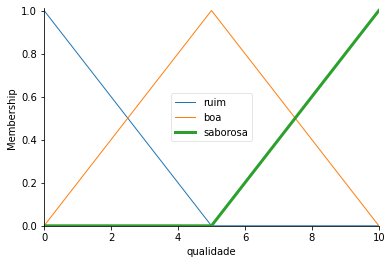

In [351]:
qualidade['saborosa'].view()

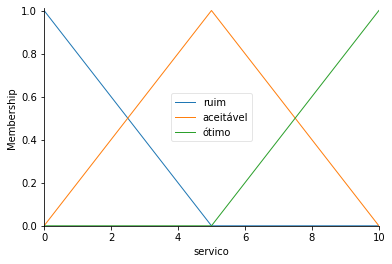

In [352]:
servico.view()

In [353]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [354]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 9]) #trimf - funcao triangular, vamos passar os valores do triangulo
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [5, 10, 15])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [11, 20, 20])

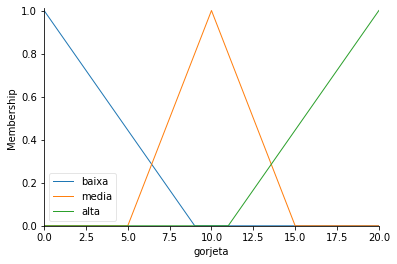

In [355]:
gorjeta.view()

In [356]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])  # | -> OU & -> E
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])
#regra2 = ctrl.Rule(servico['aceitável'] & qualidade['boa'], gorjeta['media'])
#regra3 = ctrl.Rule(servico['aceitável'] & qualidade['saborosa'], gorjeta['alta'])
#regra4 = ctrl.Rule(servico['ótimo'] & qualidade['boa'], gorjeta['media'])
#regra5 = ctrl.Rule(servico['ótimo'] & qualidade['saborosa'], gorjeta['alta'])
#regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [357]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [358]:
sistema = ctrl.ControlSystemSimulation(sistema_controle) #para simular o sistema que criamos

In [365]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()

17.0


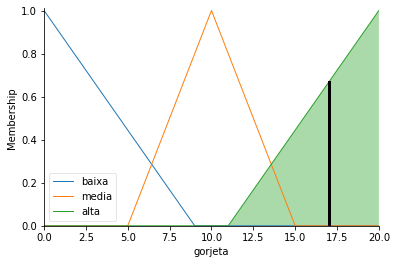

In [366]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema) #sim -> sistema